# Set Up

In [3]:
# load necessary libraries
import pandas as pd
from pandas import read_excel
import numpy as np
from collections import Counter
import seaborn as sns

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
%matplotlib inline

from pathlib import Path
from collections import Counter


In [4]:
sklearn.__version__

'1.6.1'

In [5]:
# import vectorized dataset
df_all = pd.read_csv("cleaned_total.csv")
df_all.head()

,ability,able,absolutely,aca,aca marketplace,aca plan,aca pliant,aca subsidy,accept,accept medicaid,...,year ago,year old,year work,year year,yearly,yep,yes,york,young,zero
0,0.0,0.0,0.406282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.184796
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.442149,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [6]:
df_all.shape

(7018, 1574)

In [7]:
X = df_all[:1000]
X.shape

(1000, 1574)

In [8]:
# load labels
df_labels = read_excel('comments_final.xlsx', usecols=['Date', 'Text', 'final'])
y = df_labels['final']
y

0      -1
1     -99
2     -99
3     -99
4     -99
       ..
995     1
996     1
997     1
998     1
999     1
Name: final, Length: 1000, dtype: int64

In [9]:
X.shape, y.shape

((1000, 1574), (1000,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 1574), (300, 1574), (700,), (300,))

In [13]:
y_train.value_counts(normalize=True)

final
 0     0.451429
-99    0.328571
-1     0.187143
 1     0.032857
Name: proportion, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

final
 0     0.426667
-99    0.316667
-1     0.216667
 1     0.040000
Name: proportion, dtype: float64

# Preliminary Analysis

# Baseline Model - Decision Tree
The following code trains a baseline Decision Tree model. 

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt_clf = DecisionTreeClassifier(random_state=42, criterion = 'entropy')

In [17]:
dt_clf = dt_clf.fit(X_train, y_train)

In [18]:
np.round(dt_clf.score(X_test,y_test),3)
# We obtain an accuracy of 0.603, which needs more fine-tuning

0.643

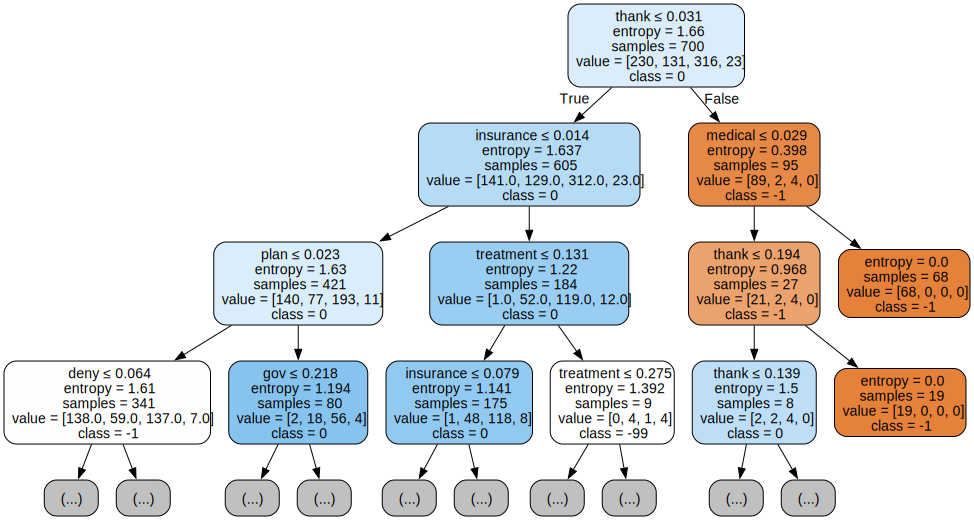

In [118]:
dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                feature_names=X.columns.tolist(), 
                                class_names=y.unique().astype(str),  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = graphviz.Source(dot_data)  
graph


The following code trains a Random Forest classifier.

In [24]:
dt_feature_importance = pd.DataFrame([np.round(dt_clf.feature_importances_,2)], columns=X.columns.tolist())
dt_feature_importance

,ability,able,absolutely,aca,aca marketplace,aca plan,aca pliant,aca subsidy,accept,accept medicaid,...,year ago,year old,year work,year year,yearly,yep,yes,york,young,zero
0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01


In [25]:
features = dt_feature_importance.T.sort_values(by=0, ascending=False)
features

,0
thank,0.13
insurance,0.09
plan,0.05
medicaid,0.03
pay,0.02
...,...
gain,0.00
fvniop question,0.00
fvniop,0.00
future,0.00


In [26]:
one_gram_features = features[~features.index.str.contains(" ")].head(20)
one_gram_features


,0
thank,0.13
insurance,0.09
plan,0.05
medicaid,0.03
pay,0.02
money,0.02
cover,0.02
deny,0.02
treatment,0.02
medical,0.02


In [28]:
two_gram_features = features[features.index.str.contains(" ")].head(20)
two_gram_features

,0
healthcare gov,0.01
healthcare cost,0.01
plaint state,0.00
pjpg auto,0.00
plan aca,0.00
plan choose,0.00
plan available,0.00
plan option,0.00
plan offer,0.00
plan need,0.00


## Fine-tuning For Decision Tree
In this section, we will use sklearn's grid search methods to fine tune the model.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'max_depth': [n for n in range(10, 1000, 10)],
    'min_samples_split': [2, 5, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4]
}

dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
grid_search = GridSearchCV(dt_clf, param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 40}
Best cross-validation score: 0.6228571428571429


In [31]:
dt_clf_tuned = DecisionTreeClassifier(max_depth=40, min_samples_leaf=4, min_samples_split=40, criterion='entropy', random_state=42)
np.round(dt_clf_tuned.fit(X_train, y_train).score(X_test, y_test), 3)

0.623

# Random Forest with Feature Selection

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
dt_rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)
dt_rf = dt_rf.fit(X_train, y_train)

In [34]:
np.round(dt_rf.score(X_test, y_test), 3)

0.64

## Feature Selection Using Select Best

Our data will be high dimensional and adjusting parameters with grid search would be very difficult computationally. Therefore, it would be more ideal to reduce dimensions first. A common approach in this case would be using SelectKBest, which gives the feature names for selection (for better interpretability)

In [35]:
from sklearn.feature_selection import SelectKBest, chi2


In [36]:
selector = SelectKBest(chi2, k=750)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [37]:
X_train_selected.shape, X_test_selected.shape

((700, 750), (300, 750))

In [38]:
# get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_feature_names = np.array(X.columns)[selected_indices]
print("Selected features:", selected_feature_names)

Selected features: ['absolutely' 'aca' 'aca plan' 'aca pliant' 'accept' 'accident' 'act'
 'action' 'action perform' 'actual' 'actually' 'additional' 'advantage'
 'advocate' 'aetna' 'affect' 'afford' 'affordability' 'affordable' 'age'
 'age state' 'agent' 'ago' 'agree' 'ah' 'allow' 'amaze' 'ambetter'
 'ambulance' 'america' 'annual' 'answer' 'answer depend' 'answer question'
 'answer reddit' 'anthem' 'appeal' 'application' 'appointment'
 'appreciate' 'approval' 'ask' 'automatically' 'automatically contact'
 'available' 'available insurance' 'avoid' 'avoid post' 'away' 'bad'
 'balance' 'ban' 'ban report' 'bankrupt' 'barely' 'base ine' 'basically'
 'bc' 'bcbs' 'bee' 'benefit' 'benefit available' 'best' 'bet' 'big'
 'billing' 'billion' 'birth' 'bit' 'blame' 'blood' 'body' 'bone' 'born'
 'bot' 'bot action' 'brand' 'breast' 'broken' 'broker' 'buck' 'cal'
 'california' 'cancel' 'cancer' 'cap' 'care' 'care act' 'care need'
 'carefully' 'carefully avoid' 'case' 'cash' 'cash price' 'catastrophic'

In [39]:
# train a new decision tree classifier with the selected features
dt_reduced = DecisionTreeClassifier(random_state=42)
dt_reduced = dt_reduced.fit(X_train_selected, y_train)
np.round(dt_reduced.score(X_test_selected, y_test), 3)

0.627

In [40]:
# train a new random forest classifier with the selected features
rf_reduced = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)

In [41]:
rf_reduced = rf_reduced.fit(X_train_selected, y_train)

In [42]:
np.round(rf_reduced.score(X_test_selected, y_test), 3)
# The accuracy is roughly the same as before

0.64

Fine-tune the model.

In [239]:
# perform a grid search to find the best parameters
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000, 2000, 3000, 4000],
    'max_features': ["sqrt", "log2", None],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

dt_clf = RandomForestClassifier(random_state=42, criterion='entropy')
grid_search = GridSearchCV(dt_clf, param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
Best cross-validation score: 0.7028571428571428


Our best parameters are given by {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}, with a cross-validation score of 0.703.

In [96]:
dt_final = RandomForestClassifier(max_depth=40, max_features="log2", criterion="entropy", n_estimators=2000, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_final = dt_final.fit(X_train_selected, y_train)
np.round(dt_final.score(X_test_selected, y_test), 3)

0.64

## Feature Selection Using Results from Decision Tree

In [142]:
top_100_features = dt_feature_importance.T.sort_values(by=0, ascending=False).head(100)
selected_feature_names = top_100_features.index.tolist()
selected_feature_names


['thank',
 'insurance',
 'plan',
 'medicaid',
 'pay',
 'money',
 'cover',
 'deny',
 'treatment',
 'medical',
 'network',
 'uhc',
 'coverage',
 'healthcare',
 'time',
 'doctor',
 'look',
 'try',
 'personally',
 'patient',
 'zero',
 'subsidy',
 'surgery',
 'year',
 'tax',
 'healthcare gov',
 'option',
 'make',
 'basically',
 'kaiser',
 'regular',
 'problem',
 'want',
 'expansion',
 'health',
 'org',
 'benefit',
 'lot',
 'billing',
 'gov',
 'absolutely',
 'correctly',
 'work',
 'reason',
 'specialty',
 'copay',
 'half',
 'paid',
 'person',
 'healthcare cost',
 'thanks',
 'fuck',
 'office',
 'friend',
 'card',
 'hit',
 'bad',
 'start',
 'face',
 'insurance cover',
 'maybe',
 'care',
 'contribute',
 'center',
 'handle',
 'op',
 'reminder',
 'department',
 'deductible',
 'hdhp',
 'charge',
 'blame',
 'term',
 'scenario',
 'ultrasound',
 'update',
 'file',
 'ago',
 'max',
 'source',
 'provider',
 'marketplace plan',
 'helpful',
 'let',
 'hr',
 'negotiate',
 'bone',
 'fee',
 'yep',
 'unless',


In [143]:
# Filter X_train and X_test to include only these top features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]
X_train_selected.shape, X_test_selected.shape

((700, 100), (300, 100))

In [144]:
# Train a new RandomForestClassifier using only the top 100 features
rf_clf_top100 = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the RandomForestClassifier using the filtered training set
rf_clf_top100.fit(X_train_selected, y_train)
np.round(rf_clf_top100.score(X_test_selected, y_test), 3)

0.657

In [328]:
# perform a grid search to find the best parameters
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000],
    'max_features': ["sqrt", "log2"],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

dt_clf = RandomForestClassifier(random_state=42, criterion='entropy')
grid_search = GridSearchCV(dt_clf, param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best cross-validation score: 0.7028571428571428


Best parameters are given by:
- max_depth: 40
- max_features: log2
- min_samples_leaf: 1
- min_sample_split: 5
- n_estimators: 500

In [145]:
rf_gs = RandomForestClassifier(max_depth=40, max_features="log2", criterion="entropy", n_estimators=500, min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_gs = rf_gs.fit(X_train_selected, y_train)
np.round(rf_gs.score(X_test_selected, y_test), 3)

0.653

In [146]:
rf_final = rf_clf_top100
rf_final

RandomForestClassifier(n_estimators=1000, random_state=42)

In [147]:
rf_feature_importance = pd.DataFrame([np.round(rf_final.feature_importances_, 3)], columns=X_train_selected.columns.tolist())
rf_feature_importance

,thank,insurance,plan,medicaid,pay,money,cover,deny,treatment,medical,...,website,prior,checked,brand,credit,wife,process,change,policy,marketplace
0,0.048,0.081,0.053,0.023,0.035,0.014,0.02,0.019,0.008,0.019,...,0.018,0.001,0.003,0.003,0.003,0.008,0.005,0.01,0.004,0.009


In [148]:
rf_features = rf_feature_importance.T.sort_values(by=0, ascending=False)
rf_features

,0
insurance,0.081
plan,0.053
thank,0.048
pay,0.035
medicaid,0.023
...,...
ultrasound,0.001
prior,0.001
insurance cover,0.001
ago,0.001


In [149]:
one_gram_features = rf_features[~rf_features.index.str.contains(" ")].head(20)
one_gram_features

,0
insurance,0.081
plan,0.053
thank,0.048
pay,0.035
medicaid,0.023
reminder,0.023
coverage,0.022
cover,0.020
year,0.020
deny,0.019


In [150]:
two_gram_features = rf_features[rf_features.index.str.contains(" ")].head(20)
two_gram_features

,0
healthcare gov,0.004
marketplace plan,0.001
insurance cover,0.001
healthcare cost,0.000


# Linear Classification

In [43]:
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [44]:
X_train.shape, X_test.shape

((700, 1574), (300, 1574))

In [46]:
clf_lr = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
np.round(clf_lr.score(X_test, y_test), 3)

0.637

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

parameter_distributions = {
    'C': uniform(0.001, 10),
    'max_iter': [1000, 5000]
}

random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=parameter_distributions,
    n_iter=10,
    cv=5,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best parameters: {'C': 9.432563118655343, 'max_iter': 1000}
Best cross-validation score: 0.6657142857142857


Best parameters: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

In [49]:
clf_lr_tuned = LogisticRegression(**random_search.best_params_, random_state=42)
clf_lr_tuned = clf_lr_tuned.fit(X_train, y_train)
np.round(clf_lr_tuned.score(X_test, y_test), 3)

0.687

In [78]:
clf_lr_tuned.classes_

array([-99,  -1,   0,   1])

In [79]:
clf_lr_tuned.coef_


array([[-0.08642551, -0.17445736, -0.06584962, ..., -0.28620303,
        -0.23113488, -0.45410045],
       [-0.1667396 , -0.02479201,  1.65032939, ..., -0.14663894,
         0.36848788, -0.16360878],
       [ 0.40802523,  0.28885391, -1.42727633, ...,  0.50150582,
        -0.58912497, -1.71486446],
       [-0.15486012, -0.08960454, -0.15720344, ..., -0.06866385,
         0.45177197,  2.33257369]])

## Classification Report

In [50]:
from sklearn.metrics import classification_report
y_pred = clf_lr_tuned.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

         -99       0.76      0.77      0.76        95
          -1       0.65      0.37      0.47        65
           0       0.65      0.85      0.74       128
           1        nan      0.00      0.00        12

    accuracy                           0.69       300
   macro avg       0.69      0.50      0.49       300
weighted avg       0.69      0.69      0.66       300



In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = clf_lr_tuned.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
print(f'ROC AUC Score: {roc_auc:.3f}')

ROC AUC Score: 0.783


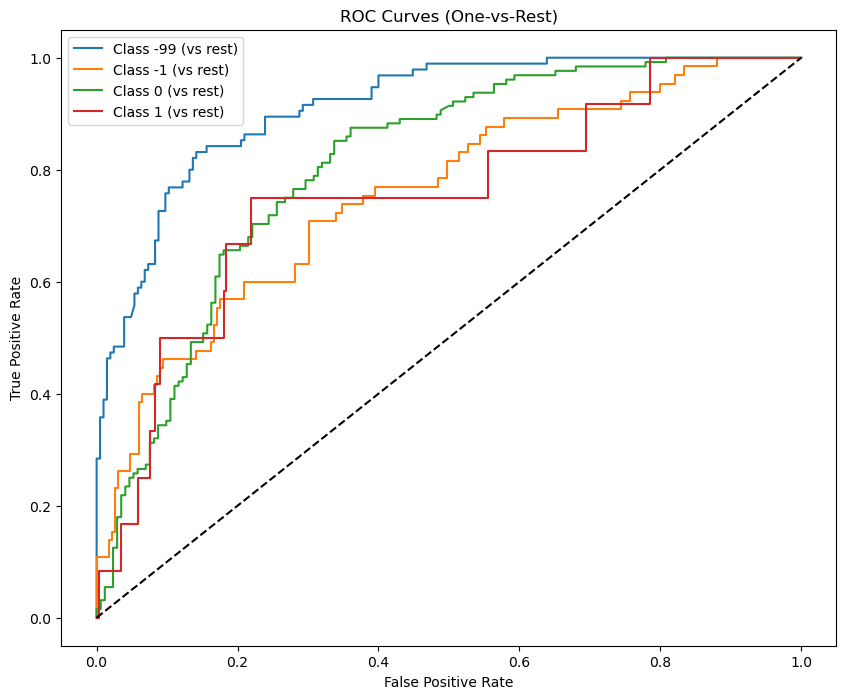

In [ ]:
from sklearn.preprocessing import label_binarize

# one-hot
classes = clf_lr_tuned.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# ROC curve
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (vs rest)')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend()
plt.show()

# Labelling

In [65]:
X_to_label = pd.read_csv("cleaned_total.csv")[1000:]
X_to_label.shape

(6018, 1574)

In [384]:
# X_to_label_selected = X_to_label[selected_feature_names]
# X_to_label_selected.shape

(6018, 100)

In [68]:
y_predict = clf_lr_tuned.predict(X_to_label)
print("Prediction counts:")
print(pd.Series(y_predict).value_counts())

Prediction counts:
 0     3361
-99    1907
-1      737
 1       13
Name: count, dtype: int64


In [69]:
# contact labeled and unlabeled data into one dataset
labeled = pd.read_excel('comments_final.xlsx', usecols=['Date', 'Text', 'final'])
unlabeled = pd.read_csv('filtered_comments.csv')


In [70]:
labeled['Date'] = labeled['Date'].str.split('_').str[0]  # Keep YYYY-MM-DD
labeled = labeled.drop('ID', axis=1, errors='ignore')  # Drop ID if exists
labeled = labeled.rename(columns={'final': 'sentiment_score'})

unlabeled['Date'] = unlabeled['ID'].str.split('_').str[0]  # Keep YYYY-MM-DD
unlabeled = unlabeled.drop('ID', axis=1)
unlabeled = unlabeled.rename(columns={'final': 'sentiment_score'})


In [71]:
all_raw_texts = pd.concat([labeled, unlabeled])
all_raw_texts.shape

(7018, 3)

In [72]:
all_raw_texts

,Date,Text,sentiment_score
0,2024-11-25,ABSOLUTELY a SCAM I am at the doctor s of...,-1.0
1,2024-11-23,It s not special I promise you,-99.0
2,2024-11-22,I noticed Forward is currently hiring on Linke...,-99.0
3,2024-12-08,Yes gross taxable pretax investments lower gr...,-99.0
4,2024-12-17,Regardless this isn t a sign of a bad company...,-99.0
...,...,...,...
6013,2024-12-17,No there s no legal requirement for an unpaid...,NaN
6014,2024-12-17,You are very alone in that opinion which is wh...,NaN
6015,2024-12-17,The same as any other post obamacare health in...,NaN
6016,2024-12-17,Thank you for your submission u AnythingNext...,NaN


In [73]:
all_raw_texts['sentiment_score'][1000:] = y_predict

/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_58595/2848339104.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_raw_texts['sentiment_score'][1000:] = y_predict
/var/folders/11/qx8t9mx577s1vr7n1wmm37th0000gn/T/ipykernel_58

In [74]:
all_raw_texts

,Date,Text,sentiment_score
0,2024-11-25,ABSOLUTELY a SCAM I am at the doctor s of...,-1.0
1,2024-11-23,It s not special I promise you,-99.0
2,2024-11-22,I noticed Forward is currently hiring on Linke...,-99.0
3,2024-12-08,Yes gross taxable pretax investments lower gr...,-99.0
4,2024-12-17,Regardless this isn t a sign of a bad company...,-99.0
...,...,...,...
6013,2024-12-17,No there s no legal requirement for an unpaid...,-99.0
6014,2024-12-17,You are very alone in that opinion which is wh...,0.0
6015,2024-12-17,The same as any other post obamacare health in...,0.0
6016,2024-12-17,Thank you for your submission u AnythingNext...,-99.0


In [393]:
all_raw_texts.to_csv("final_data_for_sentiment_analysis_v2.csv", index=False)